In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import miceforest as mf
import random
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.impute import KNNImputer

from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
dt2 = pd.DataFrame(data.data, columns=data.feature_names)
dt2[data.target_names[0]] = pd.Series(data.target)
dt2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
df2 = dt2.copy()

r1 = random.sample(range(len(df2)),36)
r2 = random.sample(range(len(df2)),34)
r3 = random.sample(range(len(df2)),37)
r4 = random.sample(range(len(df2)),30)
df2['AveRooms'] = [val if i not in r1 else np.nan for i, val in enumerate(dt2['AveRooms'])]
df2['HouseAge'] = [val if i not in r2 else np.nan for i, val in enumerate(dt2['HouseAge'])]
df2['MedHouseVal'] = [val if i not in r3 else np.nan for i, val in enumerate(dt2['MedHouseVal'])]
df2['Latitude'] =    [val if i not in r4 else np.nan for i, val in enumerate(dt2['Latitude'])]

In [6]:
df2.isna().sum()

MedInc          0
HouseAge       34
AveRooms       36
AveBedrms       0
Population      0
AveOccup        0
Latitude       30
Longitude       0
MedHouseVal    37
dtype: int64

In [7]:
# Create kernels.  # Mice Forest
kernel = mf.ImputationKernel(
  data=df2,
  save_all_iterations=True,
  random_state=1343
)
# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)
#print(kernel)
completed_dataset = kernel.complete_data(dataset=0, inplace=False)

# Miss Forest
imputer = MissForest()
X_imputed = imputer.fit_transform(df2)
X_imputed = pd.DataFrame(X_imputed, columns = df2.columns).round(1)

# Knn Imputation
impute = KNNImputer()
KNNImputed = impute.fit_transform(df2)
KNNImputed = pd.DataFrame(KNNImputed, columns = df2.columns).round(1)

Initialized logger with name mice 1-3
Dataset 0
1  | Latitude | HouseAge | AveRooms | MedHouseVal
2  | Latitude | HouseAge | AveRooms | MedHouseVal
3  | Latitude | HouseAge | AveRooms | MedHouseVal


/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` h

Iteration: 0


/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` h

Iteration: 1


/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` h

Iteration: 2


/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/danielbudi/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` h

Iteration: 3


In [8]:
missF = np.sum(np.abs(X_imputed[df2.isnull().any(axis=1)] - dt2[df2.isnull().any(axis=1)]))
mice =  np.sum(np.abs(completed_dataset[df2.isnull().any(axis=1)] - dt2[df2.isnull().any(axis=1)]))
Knn =   np.sum(np.abs(KNNImputed[df2.isnull().any(axis=1)] - dt2[df2.isnull().any(axis=1)]))
for i in [missF, mice, Knn]:
    print(np.sum(i))

222.84693251393205
435.00648291869834
414.1883862175719


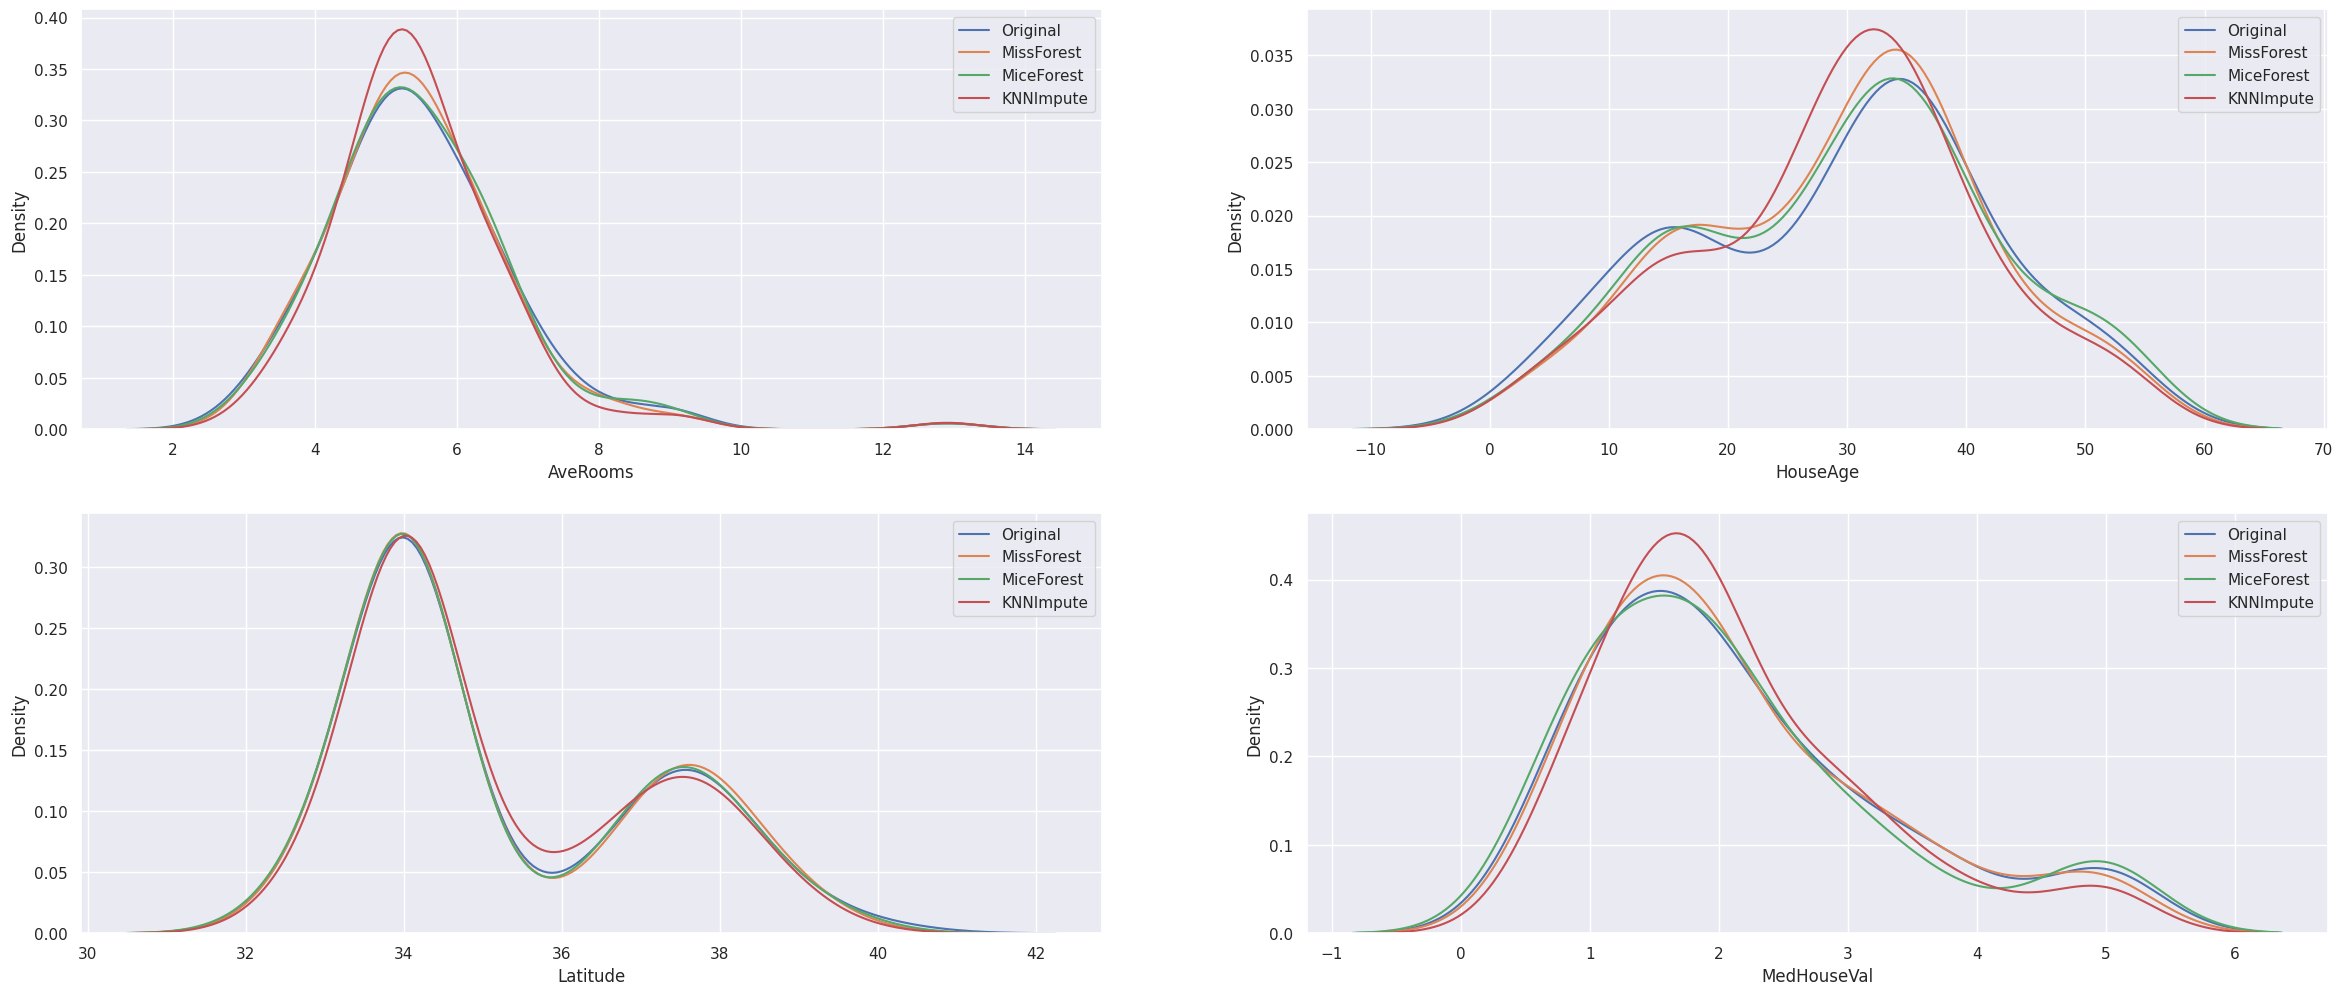

In [9]:
sns.set(style='darkgrid')
fig,ax = plt.subplots(figsize=(29,12),nrows=2, ncols=2)
for col,i,j in zip(['AveRooms','HouseAge', 'Latitude','MedHouseVal'],[0,0,1,1],[0,1,0,1]):
    sns.kdeplot(x = dt2[col][df2.isnull().any(axis=1)], label= 'Original', ax=ax[i][j] )
    sns.kdeplot(x = X_imputed[col][df2.isnull().any(axis=1)], label = 'MissForest', ax=ax[i][j])
    sns.kdeplot(x = completed_dataset[col][df2.isnull().any(axis=1)], label = 'MiceForest', ax=ax[i][j])
    sns.kdeplot(x = KNNImputed[col][df2.isnull().any(axis=1)], label='KNNImpute',  ax=ax[i][j])
    ax[i][j].legend()